In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import root_mean_squared_error
lic = pd.read_csv('/home/shoun10/documents/LIC.csv')
print(lic.tail())
print(lic.describe())
print(lic.info())
lic['Date'] = pd.to_datetime(lic['Date'],format="%d-%m-%Y",errors='coerce')
print(f'Stock prices are in between {lic.Date.min()}{lic.Date.max()}')
def difference(dd1,mm1,yy1,wd,dd2,mm2,yy2):
    weekdays=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    month = [31,28,31,30,31,30,31,31,30,31,30,31]
    #for wday in weekdays:
        #if wday == wd:
    length = len(weekdays)
    for i in range(length):
        if wd == weekdays[i] :
            k = i
    count=0
    while('true'):
        if(dd1 == dd2 and mm1 == mm2  and yy1 == yy2):
            break
        else:
            k = k+1
            if(k > 6):
                k = 0
            wd = weekdays[k]
            dd1 = dd1+1
            if(wd != weekdays[5] and wd != weekdays[6]):
                count = count+1
            if(dd1 > month[mm1-1]):
                dd1 = 1
                mm1 = mm1+1
            if(mm1 > 12):
                mm1 = 1
                yy1 = yy1+1
    print("Total days: ",count)
difference(17,5,2022,'Tuesday',4,10,2022)


          Date    Open    High     Low   Close
93  28-09-2022  627.75  627.75  620.25  621.45
94  29-09-2022  623.90  626.90  618.00  619.55
95  30-09-2022  620.25  626.40  617.00  621.65
96  03-10-2022  622.00  625.00  619.25  620.60
97  04-10-2022  624.00  631.80  624.00  629.30
             Open        High         Low       Close
count   98.000000   98.000000   98.000000   98.000000
mean   701.538265  708.165306  694.244388  698.081122
std     61.256379   63.310209   58.585598   59.471556
min    620.250000  625.000000  617.000000  619.550000
25%    666.000000  673.025000  659.112500  664.687500
50%    680.950000  687.525000  676.000000  678.400000
75%    707.987500  714.437500  701.437500  706.812500
max    885.550000  918.950000  874.100000  876.350000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    98 non-null     object 
 1   Open    98 non

<Axes: >

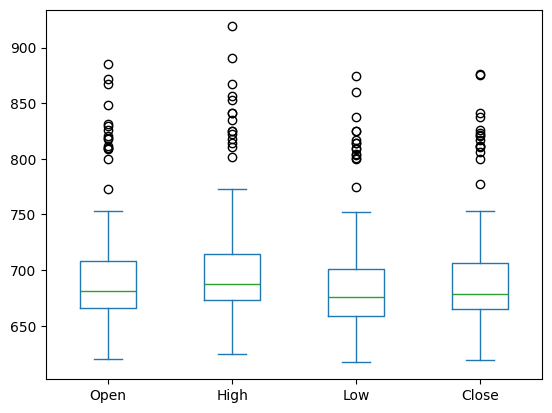

In [3]:
lic[['Open','High','Low','Close']].plot(kind='box')

In [11]:
lic['PrevClose'] = lic['Close'].shift(1)
lic = lic.dropna()
#split out validation dataset
x = lic[['Open','High','Low','PrevClose']]
y = lic['Close']
x_train,x_validation,y_train,y_validation = train_test_split(x,y,test_size=0.10,random_state=1)
#print(y_train)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_validation)
data = {'Open':[100,102,105,106,110,112],
        'High':[150,145,152,151,149,146],
        'Low':[98,100,102,101,105,106],
        'PrevClose':[99,100,98,95,97,101]}
new_lic = pd.DataFrame(data)
y_pred1 = model.predict(new_lic)
print(y_pred1)
#print(x_train)
#rmse = root_mean_squared_error(y_validation,y_pred,squared=False)
#print(f'RMSE: {rmse}')

[124.97940139 123.32274436 127.568535   125.75504568 126.63151726
 125.07677844]


Text(0, 0.5, 'Closing price')

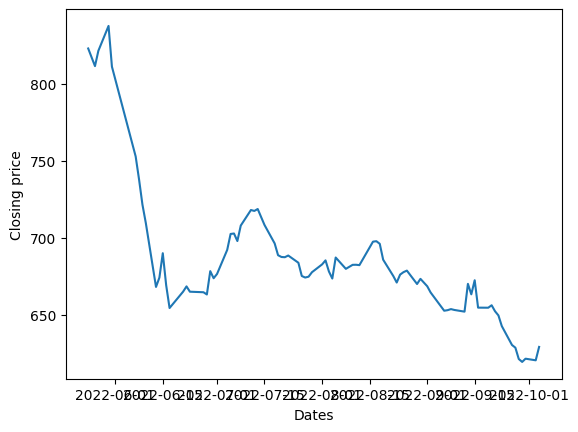

In [14]:
#filtering dates in june and july
'''lic['Date'] = pd.to_datetime(lic['Date'],format="%d-%m-%Y",errors='coerce')
lic_june_july = lic[(lic['Date'].dt.month == 6) | (lic['Date'].dt.month == 7)]
#plt.plot(lic_june_july['Date'],lic_june_july['Close'])
plt.plot(lic['Date'],lic['Close'])
plt.xlabel("Dates")
plt.ylabel("Closing price")'''
#plt.scatter(lic_june_july['Date'],lic_june_july['Close'],c="blue")